In [22]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris
from scipy import linalg


In [2]:
iris= px.data.iris()
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145      

In [3]:
iris.drop(columns=['species_id'],inplace=True)


In [4]:
iris.mean()

/tmp/ipykernel_27837/935066809.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.mean()


sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [5]:
## Matriz de Covarianza
cov_matrix=iris.cov()
cov_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


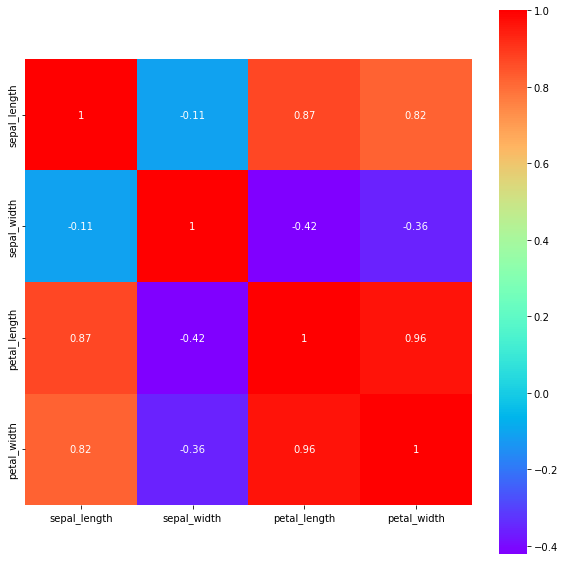

In [6]:
##Matriz de correlación

correlation_matrix=iris.corr()
print(correlation_matrix)

plt.figure(figsize=(10,10))
ax=sns.heatmap(correlation_matrix,vmax=1,square=True,annot=True,cbar_kws={"shrink":1},cmap="rainbow")

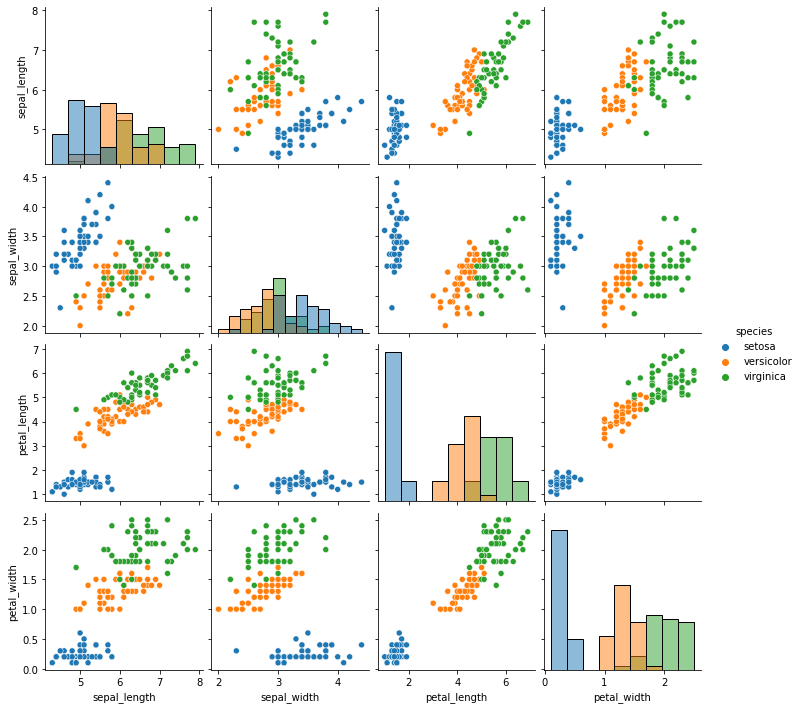

In [7]:
##
iris= px.data.iris()
iris.drop(columns=["species_id"],inplace=True)
sns.pairplot(iris, hue='species',diag_kind='hist')
plt.show()

In [10]:
iris.drop(columns=["species"],inplace=True)
iris_array=iris.to_numpy()

In [11]:
means=np.mean(iris_array,axis=0)
means

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [14]:
iris_centrado=iris_array - means
np.mean(iris_centrado,axis=0)

array([-3.31586610e-16, -2.60532336e-16,  4.73695157e-16, -9.47390314e-17])

In [16]:
## Matriz de Covarianza
cov_matrix=iris.cov()
cov_matrix_array=cov_matrix.to_numpy()
cov_matrix_array

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

## Estandarización de Univariado

[[0.68569351 0.         0.         0.        ]
 [0.         0.18800403 0.         0.        ]
 [0.         0.         3.11317942 0.        ]
 [0.         0.         0.         0.58241432]]


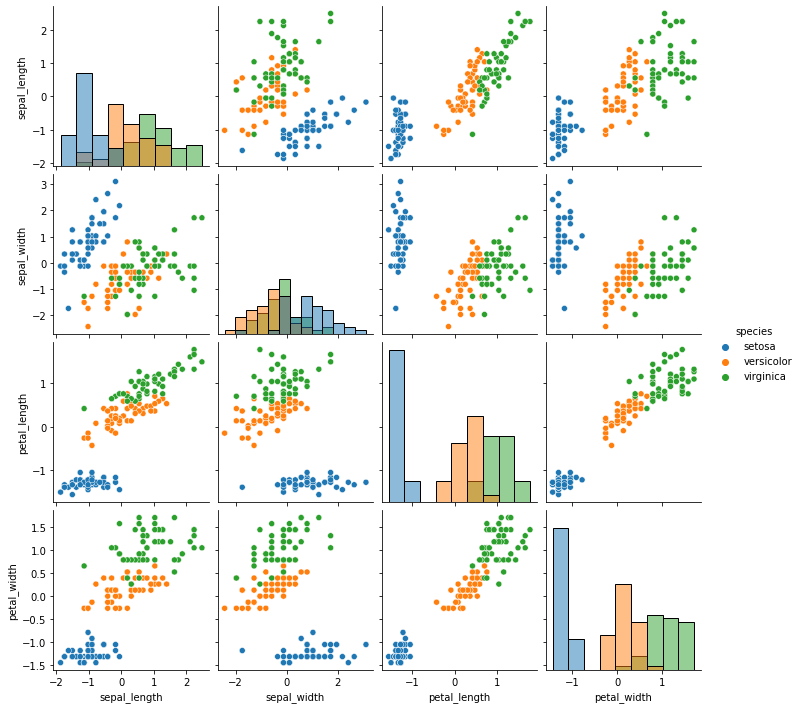

In [25]:
iris= px.data.iris()
D=np.diag(cov_matrix_array)
D=np.diag(D)
print(D)
Y=np.matmul(iris_centrado,linalg.sqrtm(linalg.inv(D)))
iris_estand_uni= pd.DataFrame(Y,columns=['sepal_length',  'sepal_width',  'petal_length',  'petal_width'])
iris_estand_uni['species']=iris['species']
sns.pairplot(iris_estand_uni,hue='species',diag_kind='hist')
plt.show()


In [27]:
cov_matriz_esta=iris_estand_uni.cov()
print(cov_matriz_esta)
print(correlation_matrix)
#The same

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


## Estandarización de Multivariado

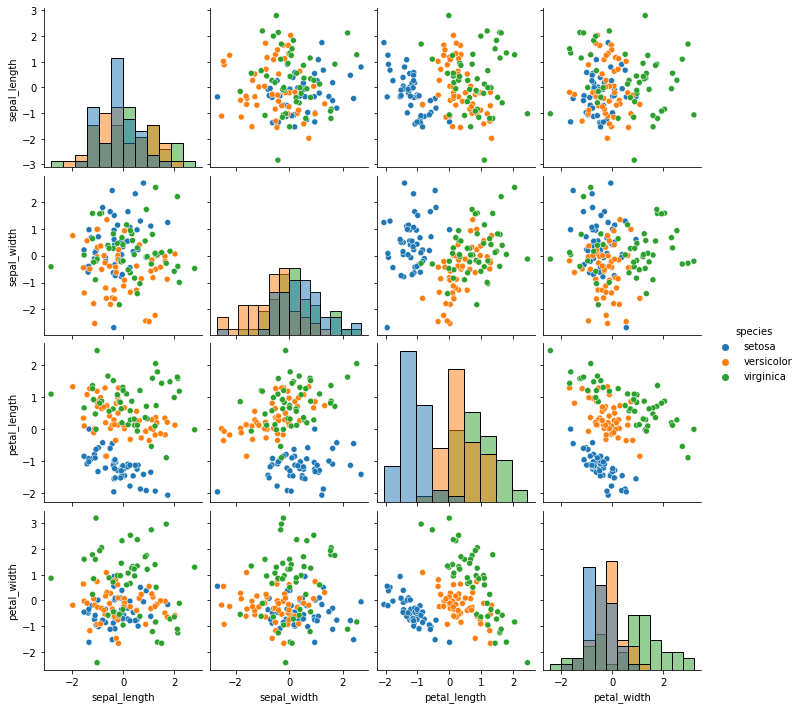

In [30]:
iris= px.data.iris()
S12=linalg.sqrtm(np.linalg.inv(cov_matrix_array))
Y=np.matmul(iris_centrado,S12)
iris_estand_uni= pd.DataFrame(Y,columns=['sepal_length',  'sepal_width',  'petal_length',  'petal_width'])
iris_estand_uni['species']=iris['species']
sns.pairplot(iris_estand_uni,hue='species',diag_kind='hist')
plt.show()
